In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Average spatial filter

In [3]:
def average_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset, weight = (mask_size)//2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            filtered_image[r,c] = 0

            for x in range(-offset, offset+1):
                for y in range(-offset, offset+1):
                    if(r+x >= 0 and r+x < height and c+y >= 0 and c+y < width):
                        filtered_image[r,c] += (image[r+x, c+y] / weight)

    return np.uint8(filtered_image)

# Function for adding salt and pepper noise

In [4]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent/100)

    for i in range(int(noise_amount)):
        index = []
        for x in range (1,5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0],index[1]], noisy_image[index[2],index[3]] = 0,255
    
    return noisy_image

# Function to Compute PSNR(Peak Signal to Noise Ratio)

In [5]:
def compute_psnr(image1, image2):
    image1 = np.float64(image1)
    image2 = np.float64(image2)

    mse = np.mean((image1-image2)**2)
    if mse == 0:
        return float('inf')  # log(0) = infinity
    
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)

    return round(psnr,2)

# Load image

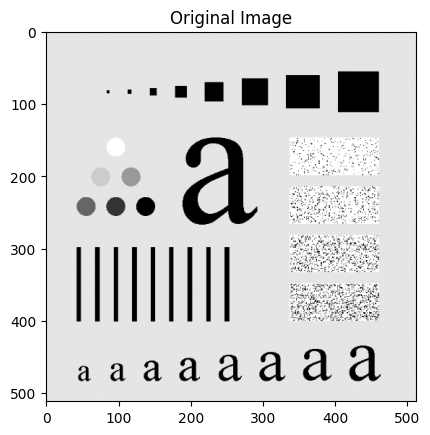

In [6]:
original_image = cv2.imread('Characters_Test_Pattern.tif', cv2.IMREAD_GRAYSCALE)
original_image = cv2.resize(original_image,(512,512))

plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Adding salt and pepper noise to image

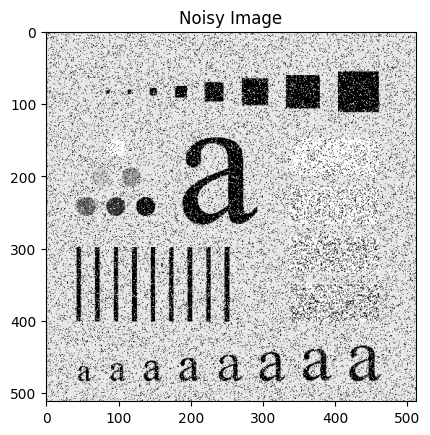

PSNR of noisy image =  11.22


In [7]:
noisy_image = add_salt_pepper_noise(original_image, 10)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.show()

psnr = compute_psnr(original_image, noisy_image)
print('PSNR of noisy image = ',psnr)

# Apply average filter with 3X3 mask size

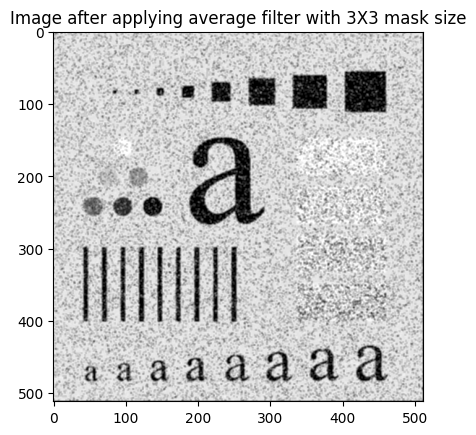

PSNR of average filtered image:  16.47


In [8]:
mask_size = 3
average_filtered_image = average_filter(noisy_image,mask_size)
plt.imshow(average_filtered_image, cmap = 'gray')
plt.title('Image after applying average filter with 3X3 mask size')
plt.show()

average_filtered_image_psnr = compute_psnr(average_filtered_image, original_image)
print('PSNR of average filtered image: ', average_filtered_image_psnr)

# Apply average filter with 5X5 mask size

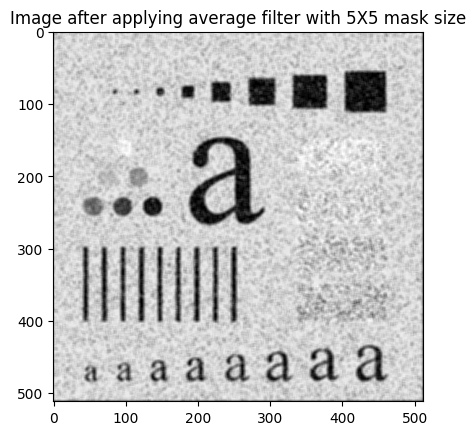

PSNR of average filtered image:  16.43


In [9]:
mask_size = 5
average_filtered_image = average_filter(noisy_image,mask_size)
plt.imshow(average_filtered_image, cmap = 'gray')
plt.title('Image after applying average filter with 5X5 mask size')
plt.show()

average_filtered_image_psnr = compute_psnr(average_filtered_image, original_image)
print('PSNR of average filtered image: ', average_filtered_image_psnr)

# Apply average filter with 5X5 mask size

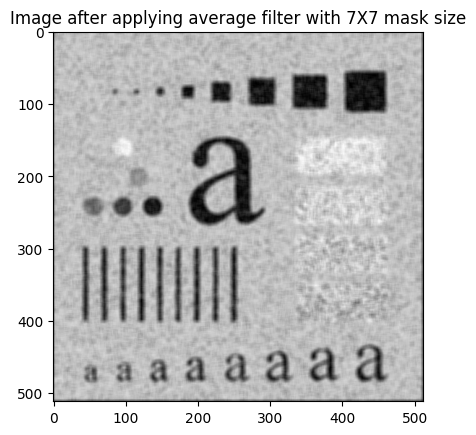

PSNR of average filtered image:  13.34


In [12]:
mask_size = 7
average_filtered_image = average_filter(noisy_image,mask_size)
plt.imshow(average_filtered_image, cmap = 'gray')
plt.title('Image after applying average filter with 7X7 mask size')
plt.show()

average_filtered_image_psnr = compute_psnr(average_filtered_image, original_image)
print('PSNR of average filtered image: ', average_filtered_image_psnr)